In [1]:
dimer_xyz = """12

C        0.67759997    0.00000000    -zcoord
C       -0.67759997    0.00000000    -zcoord
H        1.21655197    0.92414474    -zcoord
H        1.21655197   -0.92414474    -zcoord
H       -1.21655197   -0.92414474    -zcoord
H       -1.21655197    0.92414474    -zcoord
C        0.67759997    0.00000000     zcoord
C       -0.67759997    0.00000000     zcoord
H        1.21655197    0.92414474     zcoord
H        1.21655197   -0.92414474     zcoord
H       -1.21655197   -0.92414474     zcoord
H       -1.21655197    0.92414474     zcoord"""

In [2]:
import py3Dmol

viewer = py3Dmol.view(width=400, height=300)

viewer.addModel(dimer_xyz.replace("zcoord", "2.0"))
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

# rotate for a better initial view
viewer.rotate(-90, "x")

viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

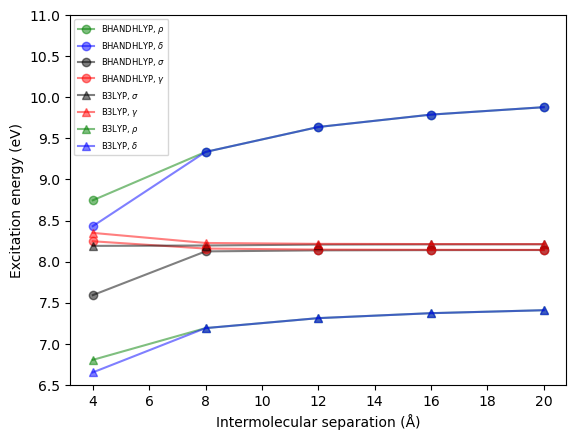

In [3]:
import matplotlib.pyplot as plt
import numpy as np

d = 2 * np.arange(2.0, 11.0, 2.0)

plt.plot(
    d,
    [8.7460, 9.3348, 9.6384, 9.7892, 9.8796],
    "o-",
    alpha=0.5,
    color="green",
    label=r"BHANDHLYP, $\rho$",
)
plt.plot(
    d,
    [8.4311, 9.3348, 9.6384, 9.7892, 9.8796],
    "o-",
    alpha=0.5,
    color="blue",
    label=r"BHANDHLYP, $\delta$",
)
plt.plot(
    d,
    [7.5915, 8.1239, 8.1364, 8.1393, 8.1403],
    "o-",
    alpha=0.5,
    color="black",
    label=r"BHANDHLYP, $\sigma$",
)
plt.plot(
    d,
    [8.2471, 8.1582, 8.1462, 8.1434, 8.1424],
    "o-",
    alpha=0.5,
    color="red",
    label=r"BHANDHLYP, $\gamma$",
)

plt.plot(
    d,
    [8.1910, 8.1955, 8.2069, 8.2095, 8.2104],
    "^-",
    alpha=0.5,
    color="black",
    label=r"B3LYP, $\sigma$",
)
plt.plot(
    d,
    [8.3491, 8.2266, 8.2157, 8.2132, 8.2123],
    "^-",
    alpha=0.5,
    color="red",
    label=r"B3LYP, $\gamma$",
)
plt.plot(
    d,
    [6.8032, 7.1899, 7.3113, 7.3716, 7.4077],
    "^-",
    alpha=0.5,
    color="green",
    label=r"B3LYP, $\rho$",
)
plt.plot(
    d,
    [6.6507, 7.1899, 7.3113, 7.3716, 7.4077],
    "^-",
    color="blue",
    alpha=0.5,
    label=r"B3LYP, $\delta$",
)

plt.legend(fontsize=6)

plt.xlabel("Intermolecular separation (Å)")
plt.ylabel("Excitation energy (eV)")

plt.setp(plt.gca(), ylim=[6.5, 11])

plt.show()

In [4]:
import veloxchem as vlx

In [5]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()

lreig_drv = vlx.LinearResponseEigenSolver()
lreig_drv.ostream.mute()
lreig_drv.nstates = 6

In [6]:
# for xcfun in ["b3lyp", "bhandhlyp"]:
for xcfun in ["bhandhlyp"]:
    print(f"XC functional: {xcfun:16s}")
    scf_drv.xcfun = xcfun

    # for zcoord in np.arange(2.0, 11.0, 2.0):
    for zcoord in np.arange(10.0, 11.0, 2.0):
        print(f"Z coordinate: {zcoord:8.2f}")

        molecule = vlx.Molecule.read_xyz_string(
            dimer_xyz.replace("zcoord", str(zcoord))
        )
        basis = vlx.MolecularBasis.read(molecule, "6-31g", ostream=None)

        scf_results = scf_drv.compute(molecule, basis)

#        lreig_drv.detach_attach = True
#        lreig_drv.filename = "dimer_20A"

        lreig_results = lreig_drv.compute(molecule, basis, scf_results)

        print(
            f"   {'E (eV)':8s}{'mu_x':8s}{'mu_y':8s}{'mu_z':8s}{'m_x':8s}{'m_y':8s}{'m_z':8s}{'f':8s}{'R':8s}"
        )
        print(72 * "-")

        for E, e, m, f, R in zip(
            lreig_results["eigenvalues"],
            lreig_results["electric_transition_dipoles"],
            lreig_results["magnetic_transition_dipoles"],
            lreig_results["oscillator_strengths"],
            lreig_results["rotatory_strengths"],
        ):
            print(
                f"{E*27.2114:8.4f}{e[0]:8.4f}{e[1]:8.4f}{e[2]:8.4f}{m[0]:8.4f}{m[1]:8.4f}{m[2]:8.4f}{f:8.4f}{R:8.4f}"
            )

XC functional: bhandhlyp       
Z coordinate:    10.00


   E (eV)  mu_x    mu_y    mu_z    m_x     m_y     m_z     f       R       
------------------------------------------------------------------------
  8.1403  0.0000  0.0000  0.0000  0.0000  4.9598  0.0000  0.0000  0.0000
  8.1424 -2.0065  0.0000  0.0000  0.0000  0.0000 -0.0000  0.8031 -0.0000
  9.5360  0.0000 -0.0000  0.0214 -0.0000  0.0000  0.0000  0.0001  0.0000
  9.5360 -0.0000 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000
  9.8796  0.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000  0.0000 -0.0000
  9.8796 -0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000


In [7]:
for state, exc_str in enumerate(lreig_results['excitation_details']):
    print("State:", state + 1)
    for orb_str in exc_str:
        print(orb_str)

State: 1
HOMO-1   -> LUMO        -0.6647
HOMO     -> LUMO+1       0.6647
HOMO     -> LUMO         0.2297
HOMO-1   -> LUMO+1       0.2297
State: 2
HOMO     -> LUMO+1       0.6647
HOMO-1   -> LUMO         0.6647
HOMO-1   -> LUMO+1       0.2297
HOMO     -> LUMO        -0.2297
State: 3
HOMO     -> LUMO+2       0.6688
HOMO-1   -> LUMO+3       0.6663
HOMO-1   -> LUMO+2       0.2270
HOMO     -> LUMO+3      -0.2261
State: 4
HOMO-1   -> LUMO+3       0.6663
HOMO     -> LUMO+2      -0.6638
HOMO     -> LUMO+3      -0.2343
HOMO-1   -> LUMO+2      -0.2334
State: 5
HOMO     -> LUMO         0.9451
HOMO-1   -> LUMO         0.3266
State: 6
HOMO-1   -> LUMO+1      -0.9451
HOMO     -> LUMO+1       0.3266


In [8]:
from valet import transition_analysis_utils as tau

In [9]:
subgroup_name = ["Ethylene 1", "Ethylene 2"]
atom_subgroup_map = [0] * 6 + [1] * 6
print(atom_subgroup_map)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [10]:
def plot_transition_diagram(state_index, filename, subgroup_name, atom_subgroup_map):
    folder = "../../data/tddft/" # Path to where the cube files were saved

    density_type_plus = "detach"  # or hole
    density_type_minus = "attach"  # or electron/particle

    hole_cube = "%s_S%d_%s.cube" % (folder + filename, state_index, density_type_plus)
    particle_cube = "%s_S%d_%s.cube" % (
        folder + filename,
        state_index,
        density_type_minus,
    )

    # We have to load the detachment and attachment densities and compute the atomic charges
    transition = tau.load_transition(hole_cube, particle_cube)
    segment_array = tau.compute_atomic_charges([transition])

    subgroup_info = tau.SubgroupInfo()

    # Determine subgroup charges
    subgroup_info.set_subgroups(subgroup_name, atom_subgroup_map)
    tau.compute_subgroup_charges(transition, subgroup_info)

    diagram_title = "Ethylene dimer: State %d" % (state_index)

    tau.create_diagram(subgroup_info, title=diagram_title, save_plot=False)

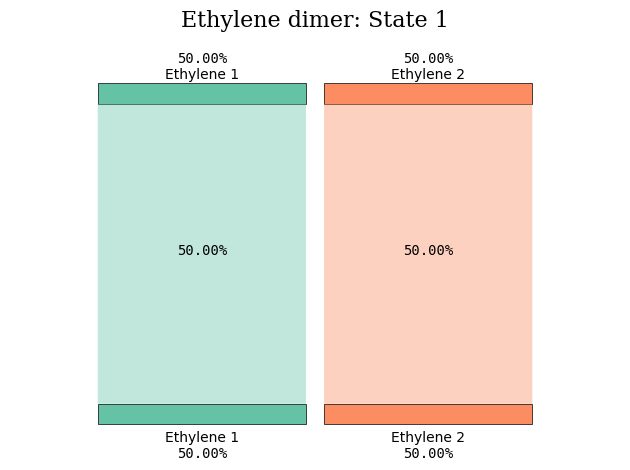

In [11]:
plot_transition_diagram(1, "dimer_20A", subgroup_name, atom_subgroup_map)

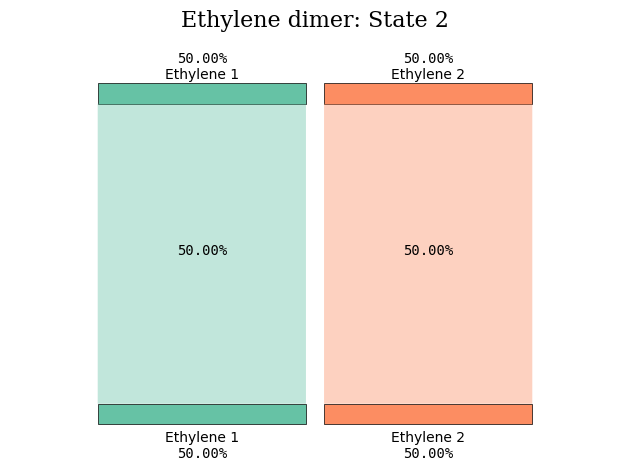

In [12]:
plot_transition_diagram(2, "dimer_20A", subgroup_name, atom_subgroup_map)

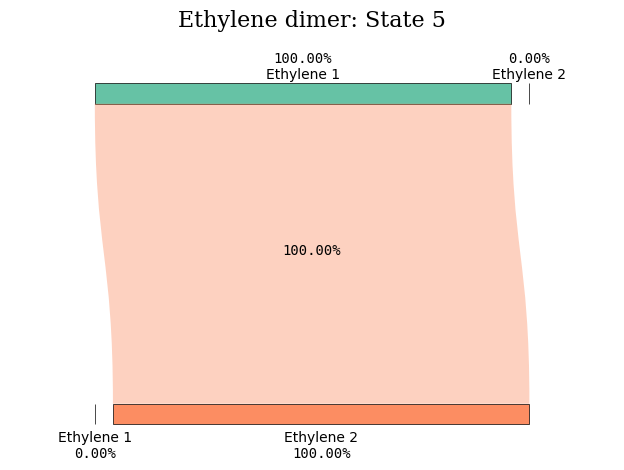

In [13]:
plot_transition_diagram(5, "dimer_20A", subgroup_name, atom_subgroup_map)

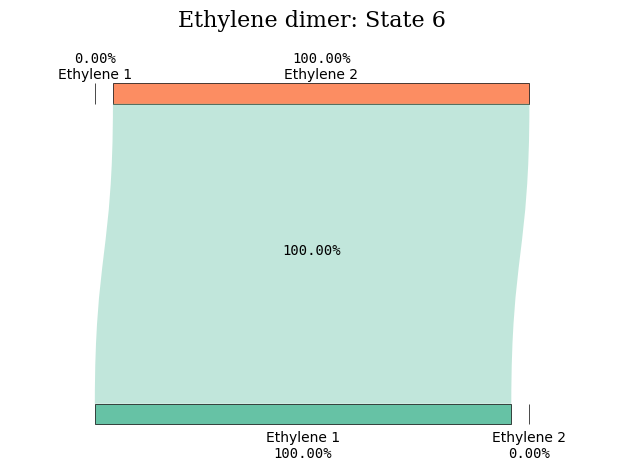

In [14]:
plot_transition_diagram(6, "dimer_20A", subgroup_name, atom_subgroup_map)